# Final Project Module 1
### Exploratory Data Analysis and Descriptive Statistics

* Student name: Natalia Quintero E.
* Student pace: Full time
* Scheduled project review date/time: Friday, December 21, 2018. 1:00pm PST
* Instructor name: Rafael Carrasco
* Blog post URL: <font color='red'>blog url here</font>

_________________________
Sections - Following the OSEMiN framework
<ul><li>Introduction</li>
    <li>Obtain
    <li>Data cleaning</li> 
    <li>Exploration</li>
    <li>Modeling (linear regression)</li>
    <li>Interpretation</li>
    <li>Sources</li></ul>


## INTRODUCTION

<p>This project attepts to predict the sale price of houses in King County, one of the most populous county in WA State. The data set has been provided in the form of a csv file and can be found in the home directory. The project requirements and expected observations from this study can be found in the index.ipynb file.</p>
<p>OSEMN or OSEMiN is an acronym that stands for Obtain, Scrub, Explore, Model and iNterpret. It is a list of tasks that a data scientist should be familiar with, not an expert on each of them. It is also considered as the blueprint for data exploration. This steps don't follow one another, as you go throught the analysis is normal to come back to any stage and move back and forth.</p>
<p><b>Obtain </b>Understand requirements, gather information about the problem to be solved, adopt and understand the tools that will be most suitable to do the job.</p>
<p><b>Scrub (clean) </b>No dataset looks pretty and organized when you load it (think about the room of a college student). This is were most of the time will be spent, data cleaning has an impact on the accuracy of the results. This is where you check for missing or null values, replace or remove them, extract columns or format data types. At this point the dataset presented should be read in a clen manner, free of irrelevant characters and in an ussable format.</p>
<p><b>Explore </b> This is where exploratory data anlalysis happens, where you get to know the data you are working with. No hypothesis are tested and no predictions are made here. The focus is to understand the distribution of the columns, check for multicollinearity, make sure the dataset meets what is neccessary for the type of model you will aply later on.</p>
<p><b>Model </b>It refers to the process of using probabilistic methods to try to predict the outcome of an event. Apply a technique(s) or algorithm(s) to predict and interpret, adjust the the ones you have to try and increase results.</p>
<p><b>Interpret </b>Draw conclussions, evaluate the meaning of the results, use visualization tools to communicate in an understandable manner.</p>

## OBTAIN

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

An initial look at the dataframe:

In [3]:
df = pd.read_csv('kc_house_data.csv')  
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Dataset information

In [4]:
# make sure the data structure is a dataframe
type(df)

pandas.core.frame.DataFrame

In [5]:
# an overview of the dataset
df.info()     #21,597 records and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<b>Familiarize with the columns:</b> a file (column_names.md) was provided with a short definition for each column; the contents of this file were confronted with information displayed for each house in the King County Parcel Viewer website, some descriptions have been complemented or changed in order to have more accurate information. 
Below there is a screen shot of the first house in the dataframe and how the information is displayed on King County's website.

<img src="DF_0.png">
Image taken from King county parcel viewer

### Column names and description
* **id:** unique identified for a house - Parcel Number
* **date:** date a house was sold
* **price:** price prediction target
* **bedrooms:** number of bedrooms/house
* **bathrooms:** number of bathrooms/house
* **sqft_living:** living sq. footage of the home. Total finished living space. This would include finished space in a basement 
* **sqft_lot:** sqr. footage of the lot. A lot is a piece of land with specific boundaries.
* **floors:** number of floors (levels) in house
* **waterfront:** <strike>house which has a view to a waterfront</strike> a property located in the waterfront
* **view:** <strike>has been viewed</strike> refers to territorial views (water, mountains, skyline)
* **condition:** relative to age and grade. Coded 1-5 
    1. Poor/worn out. Approaching abandonment or major recosntruction, effective age near the end 
    2. Fair/badly worn. Much repair needed, inadequate building utility and systems.
    3. Average. A few minor repairs needed. All major components are still functional. 
    4. Good. No obvious maintenance required but neither is everything new.
    5. Very Good. All items well maintained.


* **grade:** classification by construction quality which refers to the types of materials used and the quality of workmanship. Grades run from 1 to 13. 

    * 1-3 Falls short of minimum building standards. Normally cabin or inferior structure
    * 4	Generally older, low quality construction. Does not meet code.
    * 5	Low construction costs and workmanship. Small, simple design.
    * 6	Lowest grade currently meeting building code. Low quality materials and simple designs.
    * 7	Average grade of construction and design. Commonly seen in plats and older sub-divisions.
    * 8	Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
    * 9	Better architectural design with extra interior and exterior design and quality.
    * 10	Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
    * 11	Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
    * 12	Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
    * 13	Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


* **sqft_above:** ABOVE GRADE LIVING AREA; AGLA. The living area in a house not including the basement. 
* **sqft_basement:** square footage of the basement
* **yr_built:** year the house was built
* **yr_renovated:** year the house was renovated
* **zipcode:** address zip code 
* **lat:** latitude coordinate
* **long:** longitude coordinate
* **sqft_living15:** the square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15:** the square footage of the land lots of the nearest 15 neighbors

###### Observations:
* Missing or NaN values in waterfornt, view, yr_renovated.
* Placeholders in sqft_basement.
* By the definition of the columns,  we can see that there are two categorical columns (condition and grade). 
* Definition of the last two columns could not be verified.

## DATA CLEANING

My aproach here is to check null values, placeholdersand type (for each column). <br>
Drop columns/rows that contain a large ammount of missing values.<br>
Replace/fill missing values where possible.<br>
Create a category for  missing values, if necessary.<br>
Handle outliers. <br>

### NaN Values in the Dataframe
Check for total number of null values (NaN) in the dataset 

In [7]:
df.isna().sum()  # by column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### waterfront


In [8]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [9]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

<img src="waterfront_comp.png">
Image taken from King County parcel viewer

After a deep investigation about waterfront properties in King County, I came to the conclussion that it is better to drop this column. There are many missing values and the properties located in the waterfront (value = 1) are very few compared with the information displayed in the parcel viewer map tool which includes properties in the Puget Sound and around the many lakes in King County, therefore the number of properties on the waterfront should be higher.<br>

In [10]:
df.drop('waterfront', axis=1, inplace=True)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### view

In [12]:
df['view'].unique()     # categorical data

array([ 0., nan,  3.,  4.,  2.,  1.])

In [13]:
# drop 63 rows 
df.dropna(subset=['view'], inplace=True)

In [14]:
# confirm values have been dropped and other values have not changed in the DF
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
# verify 
df['view'].unique()  

array([0., 3., 4., 2., 1.])

#### yr_renovated

In [16]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [17]:
df['yr_renovated'].isna().sum()

3830

Some values have already been removed as a result of the procedure from above. For now, I will replace nan with value=0, meaning that the house has not been renovated.<br> Keep in mind we also have the categorical <b>condition</b> column which provide us with insights about the condition of a house according to its age.

In [18]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

In [19]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Confirm that there no NULL values in the dataframe:

In [20]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Datatype, Placeholders and Outliers

#### id
The id column is the parcel number assigned to each plot.

In [21]:
# This column will be left as it is
df['id'].dtypes

dtype('int64')

In [22]:
#df['id'].is_unique    #False
# Since this is a unique identifier for each house (parcel), we make it the index
df.set_index('id', inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### date

In [23]:
df['date'].dtypes

dtype('O')

In [24]:
# convert argument to datetime for possible manipulation later on
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [120]:
#df['date'].unique() # there are no placeholders in date column
# array(['2014-10-13T00:00:00.000000000', '2014-12-09T00:00:00.000000000', '2015-02-25T00:00:00.000000000'...

#### price

In [25]:
df['price'].dtypes

dtype('float64')

In [123]:
# df['price'].value_counts()   # no placeholders in price column
# 450000.0    171
# 350000.0    171
# 550000.0    159
# 500000.0    152
# ...

#### bedrooms

In [26]:
df['bedrooms'].dtypes

dtype('int64')

In [27]:
df['bedrooms'].unique()   # possible outlier -> 33 bedrooms

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [28]:
# there is only one entry with 33 bedrooms, this is definetely an outlier, find more information about that entry
df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [29]:
df.loc[df.bedrooms == 33]      # This entry will be removed

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [30]:
# remove outlier and confirm
df.drop(df[df.bedrooms == 33].index, inplace=True)
df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

#### bathrooms

In [31]:
df['bathrooms'].dtypes   # full = 1, sink+toilet = 0.5, shower+sink+toilet = 0.75

dtype('float64')

In [32]:
df['bathrooms'].unique()  # no placeholders or outliers

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 6.75,
       6.  , 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

#### sqft_living

In [33]:
df['sqft_living'].dtypes 

dtype('int64')

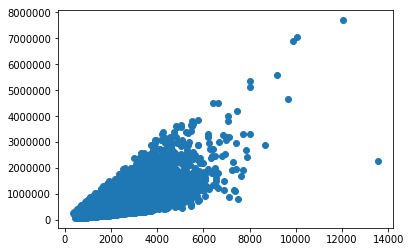

In [34]:
#df['sqft_living'].value_counts()                  # no placeholders 
plt.scatter(df['sqft_living'], df['price']);
#df['sqft_living'].max()                      

In [35]:
df.loc[df.sqft_living > 10000]   

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
9808700762,2014-06-11,7060000.0,5,4.5,10040,37325,2.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [36]:
# 3 outliers - drop
df.drop(df[df.sqft_living > 10000].index, inplace=True)

#### sqft_lot

In [37]:
df['sqft_lot'].dtypes 

dtype('int64')

In [38]:
#df['sqft_lot'].value_counts()    
#plt.scatter(df['sqft_lot'], df['price'])
df['sqft_lot'].max()   # 1651359
df.loc[df.sqft_lot > 1000000]   

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,3.0,4,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
2623069031,2014-05-21,542500.0,5,3.25,3010,1074218,1.5,0.0,5,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
2323089009,2015-01-19,855000.0,4,3.50,4030,1024068,2.0,0.0,3,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
3326079016,2015-05-04,190000.0,2,1.00,710,1164794,1.0,0.0,2,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


After checking a couple of times for max values in this column I decided to check for sqft. greater than 1,000,000.<br>
This number seems extremely large but looking at the other variables and based on the fact that this is refering to a square footage of a piece of land it's normal to have that much property in and around a house building.

#### floors

In [39]:
df['floors'].dtypes     # dtype('float64')
df['floors'].unique()   # array([1. , 2. , 1.5, 3. , 2.5, 3.5])

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

#### condition

In [40]:
df['condition'].dtypes    # dtype('int64')
df['condition'].unique()

array([3, 5, 4, 1, 2])

#### grade

In [41]:
df['grade'].dtypes      # dtype('int64')
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

#### sqft_above

In [42]:
df['sqft_above'].dtypes      # dtype('int64')
#df['sqft_above'].unique()    # no placeholders 
# array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1890, 1860,  860, 1430, ...

dtype('int64')

#### sqft_basement

In [43]:
df['sqft_basement'].dtypes               # dtype('O')
#df['sqft_basement'].value_counts()       # there are 454 placeholders (?)
# 0.0       12798
# ?           452
# 600.0       216
# 500.0       20
# ...

dtype('O')

In [44]:
df.drop(df[df.sqft_basement == '?'].index, inplace=True)     # drop rows
#df['sqft_basement'].value_counts()                           # make sure there are not placeholders after drop
# 0.0       12795
# 600.0       216
# 500.0       209
# 700.0       206
# ...

In [45]:
df['sqft_basement'] = df.sqft_basement.astype('float')    #this datatype can handle 0.00 values
df['sqft_basement'].dtypes
#df['sqft_basement'].value_counts()
# 0.0       12795
# 600.0       216
# 500.0       209
# 700.0       206
# ...

dtype('float64')

#### yr_built

In [46]:
df['yr_built'].dtypes     # dtype('int64')
df['yr_built'].unique()   # no placeholders, this can be kept as int

array([1955, 1951, 1933, 1965, 1987, 2001, 1960, 2003, 1942, 1927, 1977,
       1900, 1979, 1994, 1916, 1969, 1947, 1968, 1995, 1985, 1941, 1915,
       1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984, 1922,
       1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 2014, 1925, 1989,
       1972, 1986, 1956, 1992, 1964, 1952, 1961, 2006, 1988, 1962, 1939,
       1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905, 1971, 2010, 1945,
       1924, 1990, 1914, 1926, 1923, 2007, 1976, 1949, 1999, 1901, 1993,
       1920, 1997, 1943, 1957, 2004, 1940, 1918, 1928, 1974, 1911, 1936,
       1937, 1982, 1908, 1931, 1963, 2002, 1998, 1913, 1921, 2013, 1907,
       1958, 2012, 1912, 2011, 1932, 1944, 1902, 2009, 1903, 1970, 2015,
       1934, 1938, 1919, 1917, 1906, 1935])

#### yr_renovated

In [47]:
df['yr_renovated'].dtypes     # dtype('float64')
df['yr_renovated'].unique()   # check for plaholders before casting
df['yr_renovated'] = df.yr_renovated.astype('int')

In [48]:
df['yr_renovated'].dtypes     # dtype('int64')
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 1980,
       1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008, 1968,
       2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 2001, 1982, 1956,
       1940, 1976, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965, 1934,
       1972, 1944, 1958])

#### zipcode

In [49]:
df['zipcode'].dtypes     #dtype('int64')
df['zipcode'].unique()
# nothing to do here, everything looks fine

array([98178, 98125, 98028, 98136, 98074, 98053, 98146, 98038, 98007,
       98115, 98107, 98126, 98019, 98103, 98003, 98133, 98040, 98092,
       98030, 98002, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98118, 98199,
       98032, 98045, 98102, 98077, 98198, 98108, 98168, 98177, 98029,
       98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98010,
       98106, 98072, 98188, 98065, 98014, 98055, 98039])

#### lat and long

In [50]:
df['lat'].dtypes               # dtype('float64')
#df['lat'].value_counts()      # no placeholders
# 47.5491    17
# 47.6624    17
# 47.5322    17
# ...

dtype('float64')

In [51]:
df['long'].dtypes           # dtype('float64')
#df['long'].unique()        # no placeholders
#array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005, ...

dtype('float64')

#### sqft_living15 and sqft_lot15

In [52]:
df['sqft_living15'].dtype      # dtype('int64')
#df['sqft_living15'].unique()  # no placeholders
# array([1340, 1690, 2720, 1360, 1800, 4760, 1780, 2390, 2210, 1330, 1370, ...

dtype('int64')

In [53]:
df['sqft_lot15'].dtype       # dtype('int64')
#df['sqft_lot15'].unique()   # no placeholders
# array([5650, 7639, 8062, ..., 5731, 1509, 2007])

dtype('int64')

Checking our dataframe info after clening:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21074 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
date             21074 non-null datetime64[ns]
price            21074 non-null float64
bedrooms         21074 non-null int64
bathrooms        21074 non-null float64
sqft_living      21074 non-null int64
sqft_lot         21074 non-null int64
floors           21074 non-null float64
view             21074 non-null float64
condition        21074 non-null int64
grade            21074 non-null int64
sqft_above       21074 non-null int64
sqft_basement    21074 non-null float64
yr_built         21074 non-null int64
yr_renovated     21074 non-null int64
zipcode          21074 non-null int64
lat              21074 non-null float64
long             21074 non-null float64
sqft_living15    21074 non-null int64
sqft_lot15       21074 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11)
memory usage: 3.2 MB


In [55]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


## EXPLORATION

A visual look to each column and its frequency to get a sense of how the values are distributed

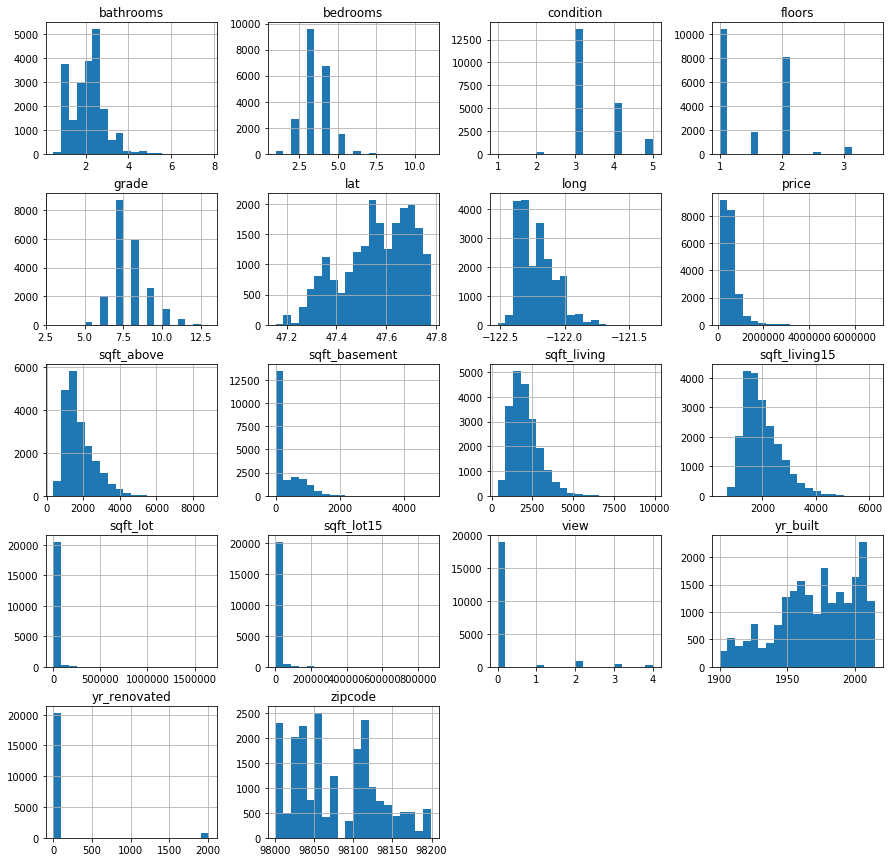

In [56]:
df.hist(figsize=(15,15), bins=20);

##### Observations
* From this visualization we can confirm the categorical data types such condition, view and grade. We can also confirm that the data points are whitin the range of values expected. 
* The distributions are non-symetrical, the variables are skewed.
* Most houses are in average condition.
* Most houses do not have a basement. This is a comon feature for eartquake prone areas.

A look at the descriptive statistics:

In [57]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.107400e+04,21074.000000,21074.000000,21074.000000,2.107400e+04,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000,21074.000000
mean,5.395396e+05,3.370599,2.115308,2079.036206,1.506430e+04,1.493523,0.232989,3.409794,7.657303,1788.099459,290.936747,1971.033786,68.196071,98077.850289,47.560330,-122.213824,1986.732609,12724.104963
std,3.604735e+05,0.901541,0.765674,910.276000,4.113117e+04,0.539274,0.764428,0.650426,1.172638,824.391939,440.495375,29.317815,362.611655,53.529457,0.138575,0.140612,685.069077,27116.761390
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572100,-122.229000,1840.000000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069675e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,6.890000e+06,11.000000,7.750000,9890.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###### What to expect in King county? 
By looking at the 50 percentile, which is the same as the median, we can see the average price and description for a house in this region.

* Price: 450,000
* 3 bedrooms / 2.25 bathrooms
* Living area around 1,910 square feet + backyard
* Build in the 70's
* Average condition, will need minor repairs 

### Checking for Multicollinearity

<ul>
    <li>How are the variables correlated?</li>
    <li>What data will be best to use to predict price?</li>
</ul>

<p>The correlation coefficient <b>r</b> measures the strength and direction of a linear relationship between two variables. The value of r is always between +1 and –1. The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase (+) or decrease (-) together.</p>
<p>For the purposes of this project we will look for coeficientes with high positive (+) values in our <b>price</b> column which is our targeted variable.

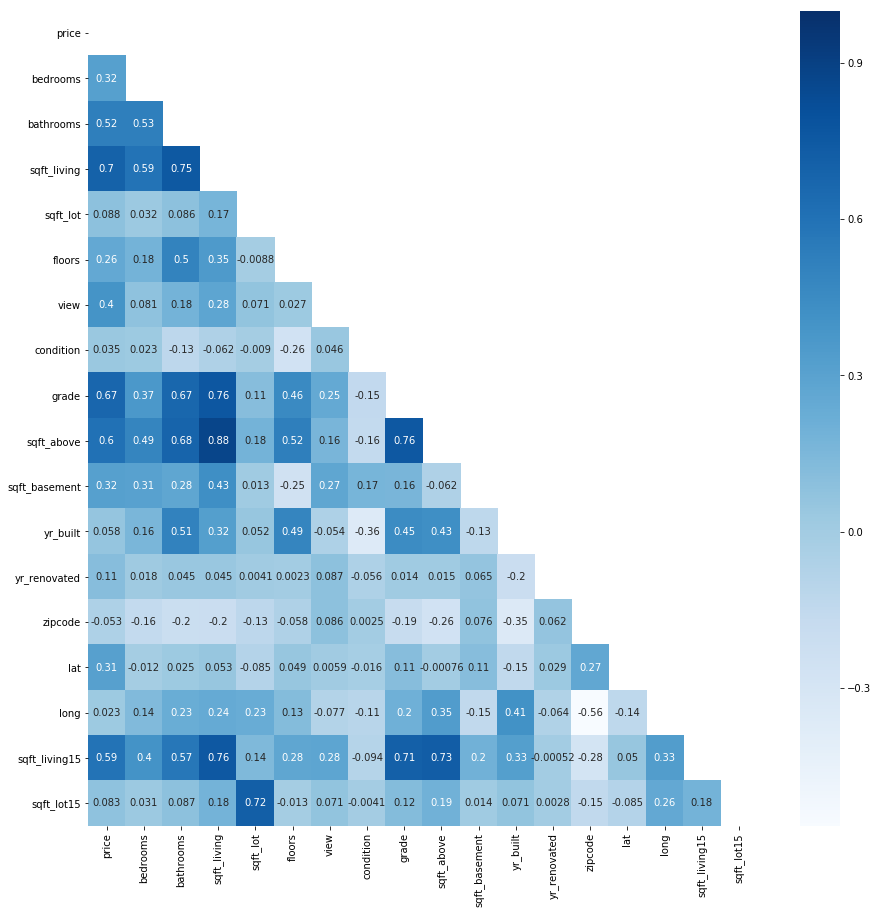

In [58]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

#Compute the correlation matrix
corr = df.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up matplotlib figure
f, ax=plt.subplots(figsize=(15,15))

#Generate heat map
sns.heatmap(corr, cmap="Blues", annot=True, mask=mask);

* sqft_living (0.7) is the strongest feature that correlates with price. This makes sence since people are most concern about the total floor-area they will use for living.
* grade (0.67) and sqft_above (0.6) also correlate strongly with price.
* price and zipcode appear to have a negative relatioship.
* condition, year built, longitude and square footage of the lot seem to have s low impact on the price.

Check for linearity with the chosen features and the target variable (price)

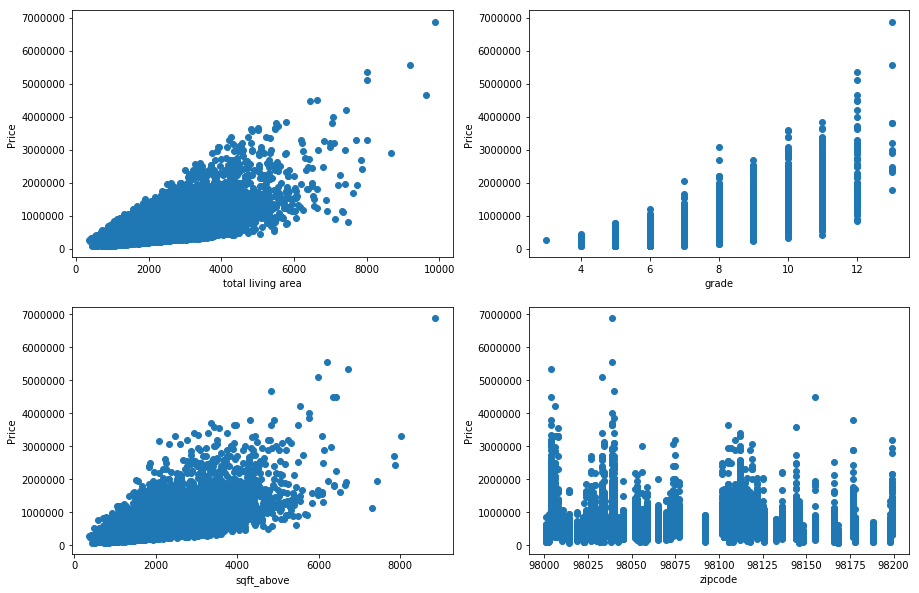

In [64]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax1.scatter(df['sqft_living'], df['price'])
plt.xlabel('total living area')
plt.ylabel('Price')

ax2 = fig.add_subplot(222)
ax2.scatter(df['grade'], df['price'])
plt.xlabel('grade')
plt.ylabel('Price')

ax3 = fig.add_subplot(223)
ax3.scatter(df['sqft_above'], df['price'])
plt.xlabel('sqft_above')
plt.ylabel('Price')

ax4 = fig.add_subplot(224)
ax4.scatter(df['zipcode'], df['price'])
plt.xlabel('zipcode')
plt.ylabel('Price')

plt.show()

###### Do people consider zipcodes when buying a house?
Surprisingly no relatioship can be stablished between zipcode and price, its correlation is very close to 0.


###### Does the age of a house has an impact on its price?

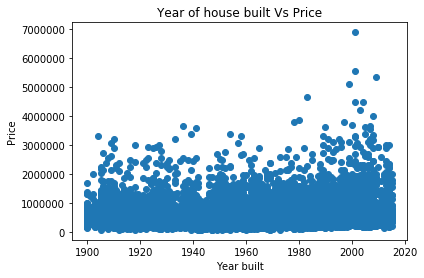

In [72]:

plt.scatter(df.yr_built, df.price)
plt.title('Year of house built Vs Price')
plt.xlabel('Year built')
plt.ylabel('Price');

 There seems to be no stablished correlation, only a few houses built in the past few years appear to be at a high cost.

## MODELING

Since we want to use <b>grade</b> in our regression model, we perform a transformation using the label encoding technique.

In [74]:
df['grade'].describe()

count    21074.000000
mean         7.657303
std          1.172638
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [78]:
grade_series = pd.Series(df.grade)

In [83]:
cat_grade = grade_series.astype('category')
cat_grade

id
7129300520     7
6414100192     7
5631500400     6
2487200875     7
1954400510     8
7237550310    11
2414600126     7
3793500160     7
1736800520     8
9212900260     7
114101516      7
6054650070     7
1175000570     7
9297300055     9
1875500060     7
6865200140     7
7983200060     7
6300500875     7
2524049179     9
7137970340     8
8091400200     7
3814700200     8
1202000200     6
1794500383     8
3303700376     8
5101402488     7
1873100390     8
8562750320     8
2426039314     7
461000390      7
              ..
7853420110     9
3052700432     8
2025049203     7
952006823      7
3832050760     7
2767604724     8
6632300207     8
2767600688     8
7570050450     8
7430200100    11
4140940150     8
1931300412     8
8672200110    10
5087900040     8
1972201967     8
7502800100     9
8956200760     9
7202300110     9
249000205     11
5100403806     8
844000965      6
7852140040     8
9834201367     8
7936000429     9
2997800021     8
263000018      8
6600060120     8
1523300141 

#### Multicollinearity of features

In [84]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
# Make a copy of the dataset without the target variable price, the date the hpuse was sold can also be removed
df_pred = df.iloc[:, 2:19]
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
# pd.plotting.scatter_matrix(df_pred,figsize  = [15, 15]);     # tried this but took about 2 mnts and plots are hard to evaluate
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.526312,0.593680,0.032314,0.183606,0.081414,0.022620,0.365449,0.491499,0.306983,0.162272,0.017997,-0.157258,-0.011991,0.135931,0.402627,0.030614
bathrooms,0.526312,1.000000,0.753515,0.086040,0.503579,0.184597,-0.128546,0.665454,0.683807,0.277373,0.510963,0.045301,-0.204545,0.024754,0.225063,0.568755,0.087022
sqft_living,0.593680,0.753515,1.000000,0.170295,0.354187,0.280700,-0.062035,0.764194,0.875630,0.427731,0.323157,0.045404,-0.200088,0.052727,0.242923,0.758074,0.182081
sqft_lot,0.032314,0.086040,0.170295,1.000000,-0.008776,0.071039,-0.008986,0.112634,0.181347,0.012518,0.052222,0.004148,-0.129570,-0.085431,0.230227,0.142546,0.718783
floors,0.183606,0.503579,0.354187,-0.008776,1.000000,0.026684,-0.264433,0.458707,0.523928,-0.248614,0.490208,0.002344,-0.058366,0.049158,0.125194,0.278711,-0.012693
view,0.081414,0.184597,0.280700,0.071039,0.026684,1.000000,0.045613,0.248528,0.163534,0.274005,-0.054318,0.087082,0.085654,0.005906,-0.076694,0.279632,0.071157
condition,0.022620,-0.128546,-0.062035,-0.008986,-0.264433,0.045613,1.000000,-0.149164,-0.159789,0.170853,-0.361863,-0.056288,0.002501,-0.015951,-0.105735,-0.093518,-0.004118
grade,0.365449,0.665454,0.764194,0.112634,0.458707,0.248528,-0.149164,1.000000,0.756454,0.163482,0.449453,0.013667,-0.185039,0.113595,0.199747,0.712696,0.121298
sqft_above,0.491499,0.683807,0.875630,0.181347,0.523928,0.163534,-0.159789,0.756454,1.000000,-0.062036,0.427940,0.015416,-0.261608,-0.000756,0.346072,0.731107,0.193779
sqft_basement,0.306983,0.277373,0.427731,0.012518,-0.248614,0.274005,0.170853,0.163482,-0.062036,1.000000,-0.133097,0.064975,0.076124,0.110375,-0.145682,0.198272,0.013607


In [89]:
# A correlation with an absolute value of 0.7 or higher is considered a high correlation.
# Check for correlations higher than |0.7|
abs(df.corr()) > 0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False


aqft_living-bathrooms,grade,sqft_above, sqft_living15
sqft_lot-sqft_lot15
grade - sqft_above, sqft_living15
aqft_above - sqft_living15

## INTERPRETATION

## SOURCES

<p><a href = "https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r">King County glossary of terms for residential parcels</a></p>
<p><a href= "https://kingcounty.gov/services/gis/Maps/parcel-viewer.aspx">King County Parcel Viewer and Information</a></p>
<p><a href="https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/">How to interpret a correlation coefficient r</a></p>